In [13]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import platform
import os

from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

In [14]:
def point_in_polygon(lon, lat, polygon):
    point = Point(lon, lat)
    return polygon.contains(point)

In [15]:
# Example polygon coordinates (latitude,longitude)
polygon_coords = [(342,35),(360,35),(360,15), (335,15),(330,20)]
polygon = Polygon(polygon_coords)

In [16]:
# Define a transformation to ensure the polygon's CRS matches
def transform_polygon(polygon, src_crs='epsg:4326', tgt_crs='epsg:4326'):
    # Transform the polygon to match the DataArray CRS if needed
    proj = pyproj.Transformer.from_proj(pyproj.Proj(src_crs), pyproj.Proj(tgt_crs), always_xy=True)
    return transform(lambda x, y: proj.transform(x, y), polygon)

polygon_transformed = transform_polygon(polygon)


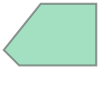

In [17]:
polygon_transformed

In [18]:
# Example data
lons = np.arange(0,360, 1)  # Longitudes
lats = np.arange(-90, 90, 1)    # Latitudes
data = np.random.rand(len(lats), len(lons))  # Random data

In [19]:
# Create DataArray
da = xr.DataArray(data, coords=[lats, lons], dims=["lat", "lon"])

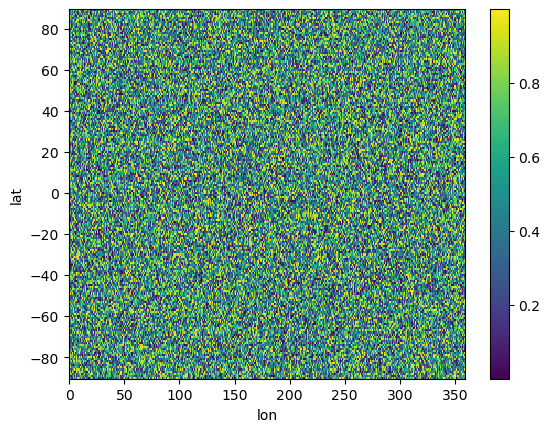

In [20]:
da.plot()

In [21]:
# Create mask array
mask = np.array([[point_in_polygon(lon, lat, polygon_transformed) for lon in da.lon.values] for lat in da.lat.values])

In [22]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [23]:
# Apply mask to DataArray
masked_da = da.where(mask)

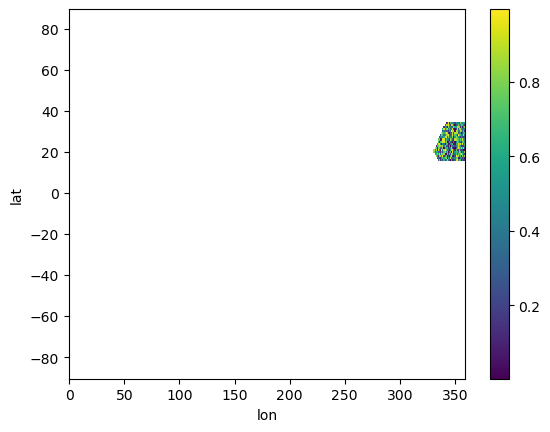

In [12]:
masked_da.plot()

In [24]:
year1=1982
year2=1992

In [25]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
elif os.uname().nodename.lower().find('rossby') != -1:
    base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [26]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]
DS = xr.open_mfdataset(files)

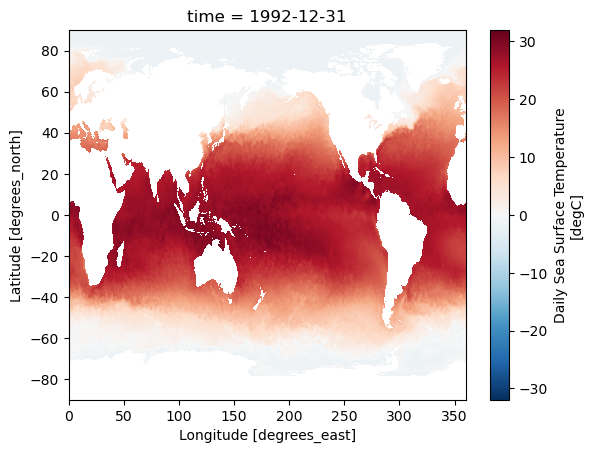

In [27]:
DS.sst[-1,:,:].plot()

In [43]:
mask = np.array([ 
    [point_in_polygon(lon, lat, polygon_transformed) 
     for lon in DS.lon.values] 
     for lat in DS.lat.values])

In [34]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
DS.lon.values

array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02,
       3.59625e+02, 3.59875e+02], dtype=float32)

In [36]:
masked_ds = DS.where(mask)

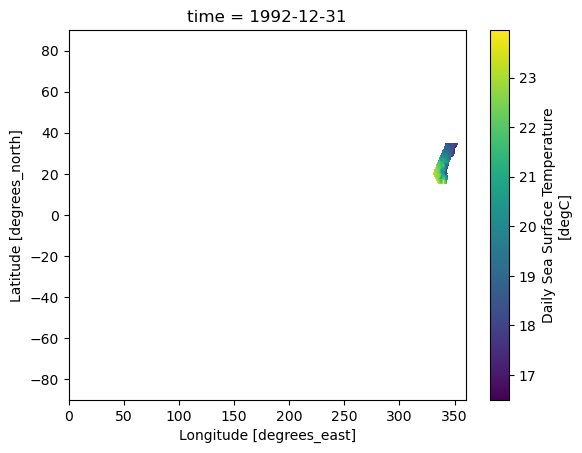

In [41]:
masked_ds.sst[-1,:,:].plot()

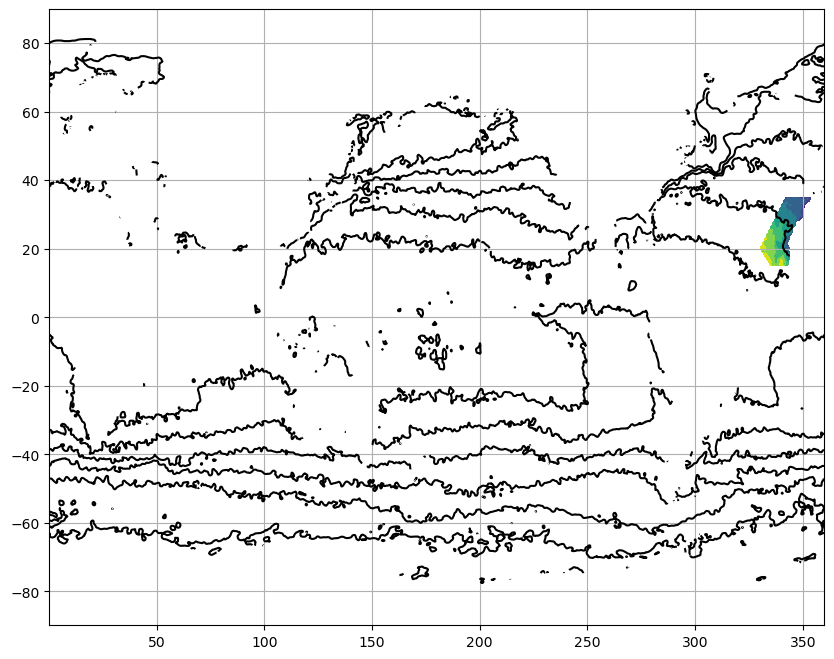

In [54]:
fig, ax = plt.subplots(1, 1 , figsize=(10,8))
ax.contour(DS.lon,DS.lat,DS.sst[-1,:,:],colors='k',levels=np.arange(0,35,5))
ax.contourf(masked_ds.lon,masked_ds.lat,masked_ds.sst[-1,:,:],)
ax.grid()

In [53]:
DS.lon

<xarray.DataArray 'lon' (lon: 1440)> Size: 6kB
array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02, 3.59625e+02,
       3.59875e+02], dtype=float32)
Coordinates:
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    actual_range:   [1.25000e-01 3.59875e+02]
    axis:           X